<h3>Name: Posh Raj Dahal</h3> <br>
<b>Matriculation Number:</b> 23172495

<h1>FAU Practial Seminar </h1> <br> <i> Title: Gene Set Enrichment Analysis </i>

<b>References</b><br>
1:  https://doi.org/10.1093/bib/bbad413 <br>
2: https://cancer.ca/en/cancer-information/cancer-types/metastatic/what-is-metastatic-cancer <br>
3: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html<br>
4. Arize, Chuck. (2023). Re: Why do we usually use Log2 when normalizing the expression of genes?https://www.researchgate.net/post/Why_do_we_usually_use_Log2_when_normalizing_the_expression_of_genes/649890fc6b67bbda940145d1/citation/download<br>
5: (Cornell University) 1.5_GenespringMTC<br>(https://physiology.med.cornell.edu/people/banfelder/qbio/resources_2008/1.5_GenespringMTC.pdf)



<h3> Importing Necessary Libraries </h3>

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

<h3> Step 1: Load and Filter Data </h3>

<h4> 1.1 Loading both datasets into pandas dataframe and normalizing them</h4>

Firstly, both datasets are loaded and preprocessed using log transformation, as this step is essential for handling gene expression data.

In [133]:
#loading datasets
with open('data/TCGA-BRCA.htseq_fpkm.tsv') as gene_file, open('data/TCGA-BRCA.GDC_phenotype.tsv') as pheno_file:
    gene_data = pd.read_csv(gene_file, sep='\t')
    pheno_data = pd.read_csv(pheno_file, sep='\t', index_col=0)

<b>Normalization</b>

In [134]:
# Temp_count1=gene_data+1
# Temp_count2=pheno_data+1
# gene_data = np.log2(Temp_count1)
# pheno_data=np.log2(Temp_count2)

In [135]:
print("Raw Gene Expression Data:")
gene_data.head()


Raw Gene Expression Data:


,Ensembl_ID,TCGA-E9-A1NI-01A,TCGA-A1-A0SP-01A,TCGA-BH-A1EU-11A,TCGA-A8-A06X-01A,TCGA-E2-A14T-01A,TCGA-AC-A8OS-01A,TCGA-A8-A09K-01A,TCGA-OL-A5RY-01A,TCGA-BH-A0DG-01A,...,TCGA-BH-A0DT-11A,TCGA-E9-A1R0-01A,TCGA-BH-A0B6-01A,TCGA-B6-A0RN-01A,TCGA-A8-A09W-01A,TCGA-EW-A1P3-01A,TCGA-A7-A13F-11A,TCGA-A2-A0T6-01A,TCGA-A7-A5ZW-01A,TCGA-BH-A203-01A
0,ENSG00000242268.2,0.091708,0.000000,0.057899,0.000000,0.000000,0.354334,0.000000,0.000000,0.000000,...,0.234169,0.107850,0.000000,0.000000,0.000000,0.000000,0.471630,0.083825,0.000000,0.061585
1,ENSG00000270112.3,0.019573,0.004701,0.016302,0.000000,0.000000,0.000000,0.005787,0.000000,0.000000,...,0.000000,0.003879,0.010047,0.000000,0.010919,0.000000,0.000000,0.000000,0.005858,0.008704
2,ENSG00000167578.15,2.235898,1.863334,1.704753,1.947481,2.734690,2.397119,2.337327,2.256976,1.968791,...,1.928209,2.004722,2.971522,1.841232,1.185122,2.861514,1.626213,1.692995,2.051916,2.197365
3,ENSG00000273842.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENSG00000078237.5,2.321945,4.226699,1.975755,2.808757,1.964479,1.792870,1.939951,2.681632,2.091932,...,2.024599,2.216023,2.124097,1.665709,2.217943,2.120565,1.605675,2.055448,2.195782,3.291072


In [136]:
print("Raw Phenotype Data:")
pheno_data.head()

Raw Phenotype Data:


,additional_pharmaceutical_therapy,additional_radiation_therapy,additional_surgery_locoregional_procedure,additional_surgery_metastatic_procedure,age_at_initial_pathologic_diagnosis,axillary_lymph_node_stage_method_type,axillary_lymph_node_stage_other_method_descriptive_text,batch_number,bcr,bcr_followup_barcode,...,days_to_collection.samples,days_to_sample_procurement.samples,initial_weight.samples,is_ffpe.samples,oct_embedded.samples,preservation_method.samples,sample_type.samples,sample_type_id.samples,state.samples,tissue_type.samples
submitter_id.samples,,,,,,,,,,,,,,,,,,,,,
TCGA-A2-A0CY-01A,NaN,NaN,NaN,NaN,63.0,Sentinel lymph node biopsy plus axillary disse...,NaN,56.91.0,Nationwide Children's Hospital,TCGA-A2-A0CY-F13731,...,1274.0,NaN,220.0,False,true,NaN,Primary Tumor,1.0,released,Not Reported
TCGA-B6-A40B-01A,NaN,NaN,NaN,NaN,76.0,Sentinel node biopsy alone,NaN,239.56.0,Nationwide Children's Hospital,TCGA-B6-A40B-F59661,...,2467.0,NaN,10.0,False,true,NaN,Primary Tumor,1.0,released,Not Reported
TCGA-AO-A0J8-01A,NaN,NaN,NaN,NaN,61.0,Sentinel node biopsy alone,NaN,56.91.0,Nationwide Children's Hospital,TCGA-AO-A0J8-F15482,...,241.0,NaN,670.0,False,true,NaN,Primary Tumor,1.0,released,Not Reported
TCGA-A8-A08J-01A,NaN,NaN,NaN,NaN,52.0,NaN,NaN,47.98.0,Nationwide Children's Hospital,TCGA-A8-A08J-F40846,...,1733.0,NaN,630.0,False,false,NaN,Primary Tumor,1.0,released,Not Reported
TCGA-E2-A14N-01A,NaN,NaN,NaN,NaN,37.0,Sentinel lymph node biopsy plus axillary disse...,NaN,103.79.0,Nationwide Children's Hospital,TCGA-E2-A14N-F19154,...,1240.0,NaN,440.0,False,false,NaN,Primary Tumor,1.0,released,Not Reported


<p>The <code>gene_data</code> DataFrame needs to be restructured to match the sample-oriented format of the <code>pheno_data</code> DataFrame. This requires several steps:</p>

<ol>
<li><b>Transposition:</b> Swap rows and columns in the <code>gene_data</code> DataFrame.</li>
<li><b>New Index:</b> Create a new index using the values from the first row of the transposed data (which originally held the column names).</li>
<li><b>Discard Duplicate:</b> Remove the first row as it is now duplicated in the index.(0<sup>th</sup> axis)</li> 
<li><b>Set Index:</b> Designate the <code>Enembl_ID</code> column as the DataFrame's index, enabling direct comparison with the <code>pheno_data</code> index (which also represents sample IDs).</li>
</ol>

In [137]:
# Transpose the DataFrame
gene_data = gene_data.T.reset_index()

# Rename the first row as the column names
gene_data.columns = gene_data.iloc[0]

# Drop the first row (now redundant)
gene_data = gene_data.drop(index=0)

# Set the index name using 'rename_axis' to avoid dropping and setting
gene_data = gene_data.set_index('Ensembl_ID')

In [138]:
gene_data.head(10)

,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,...,ENSG00000238244.3,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
Ensembl_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-E9-A1NI-01A,0.091708,0.019573,2.235898,0.0,2.321945,3.620056,0.0,0.337087,7.705589,0.084661,...,0.0,0.073008,0.0,0.0,0.0,3.680055,0.28564,0.0,0.599579,0.0
TCGA-A1-A0SP-01A,0.0,0.004701,1.863334,0.0,4.226699,3.546117,0.0,0.016016,6.835508,0.0,...,0.0,0.0,0.0,0.105328,0.055477,3.969785,0.115149,0.0,1.382192,0.0
TCGA-BH-A1EU-11A,0.057899,0.016302,1.704753,0.0,1.975755,3.396943,0.0,0.041455,7.12531,0.461624,...,0.0,0.039503,0.0,0.092108,0.0,3.011921,0.384451,0.0,0.629043,0.0
TCGA-A8-A06X-01A,0.0,0.0,1.947481,0.0,2.808757,4.72327,0.0,0.002361,7.259318,0.088912,...,0.0,0.118749,0.0,0.0,0.0,4.059347,0.345883,0.0,0.396315,0.0
TCGA-E2-A14T-01A,0.0,0.0,2.73469,0.0,1.964479,3.770091,0.0,0.111647,7.643035,0.066036,...,0.0,0.0,0.0,0.113546,0.0,4.249147,0.065679,0.0,0.157504,0.0
TCGA-AC-A8OS-01A,0.354334,0.0,2.397119,0.0,1.79287,3.556193,0.0,0.037629,6.474977,0.521882,...,0.0,0.062172,0.0,0.578244,0.065433,3.935869,0.837305,0.0,0.662529,0.0
TCGA-A8-A09K-01A,0.0,0.005787,2.337327,0.0,1.939951,3.83783,0.0,0.011851,7.360486,0.341126,...,0.0,0.009412,0.0,0.302377,0.0,4.082827,0.198863,0.0,0.174878,0.0
TCGA-OL-A5RY-01A,0.0,0.0,2.256976,0.0,2.681632,3.644497,0.0,0.021054,7.620826,0.289074,...,0.0,0.0,0.0,0.151625,0.0,3.931459,0.216728,0.0,1.724989,0.0
TCGA-BH-A0DG-01A,0.0,0.0,1.968791,0.0,2.091932,3.673006,0.0,0.22601,7.195859,0.344982,...,0.0,0.017284,0.0,0.060648,0.0,3.870035,0.102007,0.0,0.580636,0.0


<h4>1.2 Partitioning the gene expression data frame into two data frames</h4>

Per the research paper<sup>[1]( https://doi.org/10.1093/bib/bbad413
)</sup>, <cite>"The data were further filtered by only keeping samples from primary tumor tissue (i.e. samples with entry "Primary Tumor" in the column <code>"sample_type.sample"</code> of the phenotype files) that appear in both the gene expression and the phenotype data."</cite>
Therefore, the variable that contains the necessary information to split the data into primary tumor samples and healthy tissues is the <code>"sample_type.sample"</code> column in the phenotype files from TCGA.

In [139]:
#checking for entries in sample_types
sample_types = pheno_data['sample_type.samples'].unique()
print(sample_types)

['Primary Tumor' 'Solid Tissue Normal' 'Metastatic' nan]


Primary tumor and solid tissue normal sample information will be extracted from the <code>pheno_data</code> DataFrame, resulting in two distinct datasets. This is based on the established understanding that metastatic tissue is not considered healthy tissue, as it originates from cancerous cells that have spread from the primary tumor site <sup> [2](https://cancer.ca/en/cancer-information/cancer-types/metastatic/what-is-metastatic-cancer)</sup>. Rows with missing tissue type information(NaN) will be excluded to ensure data integrity.

In [140]:
#Dropping nan values from pheno_data
pheno_data.dropna(subset=['sample_type.samples'], inplace=True)
sample_types = pheno_data['sample_type.samples'].unique()
print(sample_types)

['Primary Tumor' 'Solid Tissue Normal' 'Metastatic']


In [141]:
# getting primary tumor samples and healthy tissue samples

primary_tumor_samples = pheno_data[pheno_data['sample_type.samples'] == 'Primary Tumor']
healthy_tissue_samples= pheno_data[pheno_data['sample_type.samples']== 'Solid Tissue Normal']

The <code>pheno_data</code> DataFrame is utilized to obtain the necessary sample information. Subsequently, the <code>gene_data</code> DataFrame has to be partitioned into two distinct dataframes, one comprising primary tumor samples and the other containing healthy tissue samples, based on the intersection of their indices with <code>pheno_data</code> dataframe.

<b>Dividing <code>gene_data</code> dataframe into primary tumor:</b>

In [142]:
# Find common indices directly using set intersection
common_indices1 = gene_data.index.intersection(primary_tumor_samples.index)

# Filter gene_data using the common indices
primary_tumor_df = gene_data.loc[common_indices1]
primary_tumor_df.head()


,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,...,ENSG00000238244.3,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
TCGA-E9-A1NI-01A,0.091708,0.019573,2.235898,0.0,2.321945,3.620056,0.0,0.337087,7.705589,0.084661,...,0.0,0.073008,0.0,0.0,0.0,3.680055,0.28564,0.0,0.599579,0.0
TCGA-A1-A0SP-01A,0.0,0.004701,1.863334,0.0,4.226699,3.546117,0.0,0.016016,6.835508,0.0,...,0.0,0.0,0.0,0.105328,0.055477,3.969785,0.115149,0.0,1.382192,0.0
TCGA-A8-A06X-01A,0.0,0.0,1.947481,0.0,2.808757,4.72327,0.0,0.002361,7.259318,0.088912,...,0.0,0.118749,0.0,0.0,0.0,4.059347,0.345883,0.0,0.396315,0.0
TCGA-E2-A14T-01A,0.0,0.0,2.73469,0.0,1.964479,3.770091,0.0,0.111647,7.643035,0.066036,...,0.0,0.0,0.0,0.113546,0.0,4.249147,0.065679,0.0,0.157504,0.0
TCGA-AC-A8OS-01A,0.354334,0.0,2.397119,0.0,1.79287,3.556193,0.0,0.037629,6.474977,0.521882,...,0.0,0.062172,0.0,0.578244,0.065433,3.935869,0.837305,0.0,0.662529,0.0


<b>Dividing <code>gene_data</code> dataframe into healthy tissue:</b>

In [143]:
# Find common indices directly using set intersection
common_indices2 = gene_data.index.intersection(healthy_tissue_samples.index)

# Filter gene_data using the common indices
healthy_tissue_df = gene_data.loc[common_indices2]
healthy_tissue_df.head()


,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,...,ENSG00000238244.3,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
TCGA-BH-A1EU-11A,0.057899,0.016302,1.704753,0.0,1.975755,3.396943,0.0,0.041455,7.12531,0.461624,...,0.0,0.039503,0.0,0.092108,0.0,3.011921,0.384451,0.0,0.629043,0.0
TCGA-BH-A203-11A,0.88486,0.004573,1.528933,0.0,2.777692,3.176227,0.0,0.040168,7.393084,0.300738,...,0.0,0.0,0.0,0.0,0.053993,2.666781,0.238304,0.0,0.436469,0.0
TCGA-E9-A1RH-11A,0.648978,0.017389,1.412911,0.0,1.29709,2.329433,0.0,0.022267,7.017893,0.380504,...,0.0,0.014176,0.0,0.098084,0.101419,2.740644,0.196326,0.0,0.362766,0.0
TCGA-BH-A18J-11A,0.321835,0.0248,1.864835,0.0,2.109833,3.517454,0.0,0.044234,7.476267,0.193887,...,0.0,0.0,0.0,0.138279,0.0,3.415944,0.372135,0.0,1.004031,0.0
TCGA-BH-A0E0-11A,0.220517,0.0,1.801953,0.0,1.759364,3.526591,0.0,0.024295,8.308062,0.266373,...,0.0,0.0,0.0,0.235433,0.0,3.563991,0.256355,0.0,0.554071,0.0


<h3> Step 2:  Identifying differentially expressed genes</h3>

<h4> 2.1 Finding genes that are differentially expressed </h4>

We need to find genes that are differentially expressed between primary tumor and healthy tissue samples using the <b>Mann-Whitney U test</b>

<b>Mann-Whitney U test</b>

 <cite>"The Mann-Whitney U test is a nonparametric test of the null hypothesis that the distribution underlying sample x is the same as the distribution underlying sample y. It is often used as a test of difference in location between distributions."</cite><sup>[3](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)</sup>

<b>Log2 Fold Change </b>

Gene expression data is frequently log2-transformed to better approximate the biologically detectable changes in gene activity.  This transformation also facilitates the calculation of fold changes, aiding in the identification of up-regulated and down-regulated genes. <sup> [4](https://www.researchgate.net/post/Why_do_we_usually_use_Log2_when_normalizing_the_expression_of_genes/649890fc6b67bbda940145d1/citation/download.)</sup>



In [144]:
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

primary_tumor_df = primary_tumor_df.apply(pd.to_numeric, errors='coerce')
healthy_tissue_df = healthy_tissue_df.apply(pd.to_numeric, errors='coerce')
# Function to calculate log2 fold change
def log2_fold_change(group1, group2):
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    if mean1 == 0 or mean2 == 0:
        return np.nan # Return NaN if any mean is zero
    return np.log2(mean1 / mean2)
    
# Find common genes between both DataFrames- must be 0 since we dropped NaN from both
common_genes = primary_tumor_df.index.intersection(healthy_tissue_df.index)
print(f"Number of common genes: {len(common_genes)}")


results = []
for gene in primary_tumor_df.columns:
    # Mann-Whitney U test
    stat, p_value = mannwhitneyu(primary_tumor_df[gene], healthy_tissue_df[gene], alternative='two-sided')
    
    # Log2 fold change calculation
    fold_change = log2_fold_change(primary_tumor_df[gene], healthy_tissue_df[gene])

    results.append({'Gene': gene, 'p_value': p_value, 'log2_fold_change': fold_change})

print(f"Number of results: {len(results)}")
if len(results) > 0:
    print(f"Example result: {results[0]}")


Number of common genes: 0
Number of results: 60483
Example result: {'Gene': 'ENSG00000242268.2', 'p_value': 1.6333779825728924e-52, 'log2_fold_change': -3.381739787142867}


<b> Multiple Testing Correction </b>

Multiple testing correction methods are applied to adjust p-values and account for the inflated probability of false positives arising from numerous statistical comparisons. In microarray data analysis, this is crucial to avoid incorrectly identifying genes as differentially expressed when they are not. There are  four types of multiple testing corrections: <br>
A. Bonferroni <br>
B. Bonferroni Step-down (Holm)<br>
C. Westfall and Young Permutation 
<br>D. Benjamini and Hochberg False Discovery Rate<br>

Multiple testing correction methods vary in their level of conservativeness, with Bonferroni being the most stringent and the Benjamini-Hochberg FDR method being the least.  The stringency of a correction method directly impacts the rate of false positive genes identified, with more stringent methods resulting in fewer false positives. 
The normal practice is to select a less stringent or no multiple testing correction. The <b>Benjamini-Hochberg False Discovery Rate (FDR)</b> method is a commonly employed multiple testing correction.  It strikes a balance between identifying statistically significant genes and minimizing the occurrence of false positives, making it a less stringent option compared to other correction methods. <sup>[5](https://physiology.med.cornell.edu/people/banfelder/qbio/resources_2008/1.5_GenespringMTC.pdf)</sup><br> 
 


Within the Statsmodels statistical library, the Benjamini/Hochberg (non-negative) procedure, designated as <code>fdr_bh</code>, is the appropriate method for implementing the Benjamini-Hochberg False Discovery Rate (FDR) correction when addressing the multiple comparisons problem.


In [145]:
# Create DataFrame and adjust p-values for multiple testing
results_df = pd.DataFrame(results)
print(f"Columns in results_df: {results_df.columns}")

if 'p_value' in results_df.columns:
    # 
    results_df['Adjusted P-value'] = multipletests(results_df['p_value'], method='fdr_bh')[1]
else:
    raise KeyError("The 'p_value' column is missing in the results DataFrame.")

# Save to CSV
results_df.to_csv("Output/differentially_expressed_results.csv", index=False)
#Show the result
results_df.head()

Columns in results_df: Index(['Gene', 'p_value', 'log2_fold_change'], dtype='object')


,Gene,p_value,log2_fold_change,Adjusted P-value
0,ENSG00000242268.2,1.633378e-52,-3.381740,1.203308e-50
1,ENSG00000270112.3,8.801294e-01,0.902313,9.489770e-01
2,ENSG00000167578.15,1.178446e-18,0.336292,8.399243e-18
3,ENSG00000273842.1,3.087657e-01,NaN,4.350629e-01
4,ENSG00000078237.5,8.661878e-07,0.172237,2.889142e-06


<h3> Step 3:  Generating a Volcano Plot</h3>

We generate a volcano plot visualizing the results generated in Step 2, using appropriate seaborn and matplotlib functions.

In [146]:
#reading csv file:
volcano_df=pd.read_csv("Output/differentially_expressed_results.csv")
volcano_df.head(10)

,Gene,p_value,log2_fold_change,Adjusted P-value
0,ENSG00000242268.2,1.633378e-52,-3.381740,1.203308e-50
1,ENSG00000270112.3,8.801294e-01,0.902313,9.489770e-01
2,ENSG00000167578.15,1.178446e-18,0.336292,8.399243e-18
3,ENSG00000273842.1,3.087657e-01,NaN,4.350629e-01
4,ENSG00000078237.5,8.661878e-07,0.172237,2.889142e-06
5,ENSG00000146083.10,3.129658e-10,0.138964,1.342205e-09
6,ENSG00000225275.4,9.608383e-01,0.091493,1.000000e+00
7,ENSG00000158486.12,9.099404e-02,1.174351,1.566146e-01
8,ENSG00000198242.12,6.911177e-02,-0.012933,1.228317e-01
9,ENSG00000259883.1,3.455313e-41,-1.191297,9.430852e-40


We need to highlight the 10 genes with the smallest P-values by plotting them in a different color and annotating the dots with the gene IDs.

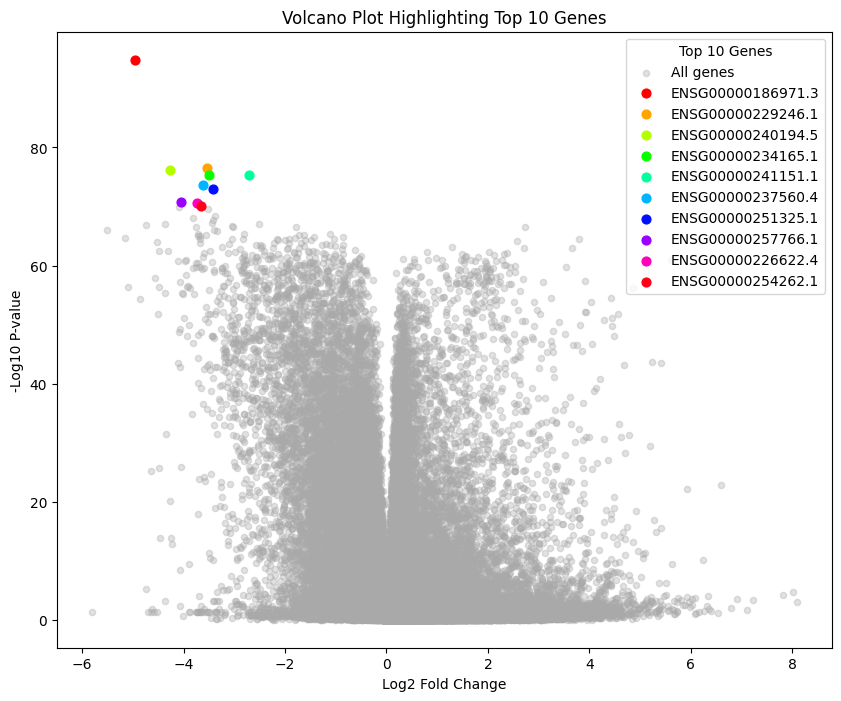

In [147]:
# Sort the DataFrame by p-value and extract the top 10 genes
top_genes_df = volcano_df.nsmallest(10, 'p_value')
colors = plt.cm.hsv(np.linspace(0, 1, 10))

# Create scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(volcano_df['log2_fold_change'], -np.log10(volcano_df['p_value']), color='darkgrey', label='All genes', alpha=0.35, s=20)

# Plot top genes with individual colors and labels
for i in range(len(top_genes_df)):  
    row = top_genes_df.iloc[i]  
    plt.scatter(row['log2_fold_change'], -np.log10(row['p_value']), color=colors[i], s=40, label=row['Gene'])
    
# Annotate the top 10 genes
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='All genes', markerfacecolor='gray', markersize=8)]  # Legend entry for 'All genes'
for i in range(len(top_genes_df)):
    row = top_genes_df.iloc[i]
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label=row['Gene'], markerfacecolor=colors[i], markersize=8))
# Add labels and title
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 P-value')
plt.title('Volcano Plot Highlighting Top 10 Genes')
plt.legend(title="Top 10 Genes")

#Saving the figure into pdf and displaying the plot
plt.savefig('Output/Top_10_Gene_Volcano_Plot.pdf')
# Show the plot
plt.show()

<h3>Step 4: Carry out gene set enrichment analysis</h3>

Gene Set Enrichment Analysis (GSEA) assesses whether a predefined group of genes exhibits statistically significant differences in expression between two biological conditions

<b> Importing necessary libraries </b>

In [148]:
import gseapy as gp
import re
from gseapy import Biomart
from pybiomart import Server
#top_genes_df.head()
a_df=volcano_df.nsmallest(20, 'p_value')


In [149]:
import gseapy as gp
import pandas as pd
import matplotlib.pyplot as plt

# 1. Ensure gene_names are strings before mapping to Ensembl IDs
analysis_df = pd.DataFrame(a_df)
print(f"analysis_df\n: {analysis_df}")

# Remove version numbers from Ensembl IDs (everything after the dot)
analysis_df['Gene'] = analysis_df['Gene'].str.split('.').str[0]
top_genes=analysis_df['Gene']
top_genes_list=top_genes.tolist()
top_genes_list== list(set(top_genes_list))
print(f"top_genes_list\n: {top_genes_list}")

bm = Biomart()
querry={'ensembl_gene_id': top_genes_list}
print(f"querry\n: {querry}")

# Query Biomart to map Ensembl IDs to gene names
gene_name_mapping = bm.query(dataset='hsapiens_gene_ensembl', 
                                  attributes=['ensembl_gene_id', 'external_gene_name'],
                                  filters= querry)

# Extract only the gene names and convert to list
gene_names = gene_name_mapping['external_gene_name'].dropna().tolist() 
print(gene_names)








analysis_df
:                     Gene       p_value  log2_fold_change  Adjusted P-value
36537  ENSG00000186971.3  1.376707e-95         -4.950316      8.326739e-91
10605  ENSG00000229246.1  3.185537e-77         -3.535327      9.633543e-73
21460  ENSG00000240194.5  7.394442e-77         -4.259768      1.490793e-72
30405  ENSG00000234165.1  4.964663e-76         -3.502605      6.038440e-72
17922  ENSG00000241151.1  4.991849e-76         -2.718629      6.038440e-72
54571  ENSG00000237560.4  1.908796e-74         -3.617784      1.924162e-70
16776  ENSG00000251325.1  1.011360e-73         -3.427460      8.738586e-70
49896  ENSG00000257766.1  1.767287e-71         -4.060399      1.336135e-67
28681  ENSG00000226622.4  2.515137e-71         -3.735205      1.690256e-67
27118  ENSG00000254262.1  7.026562e-71         -3.661504      4.249876e-67
7896   ENSG00000267603.1  1.077941e-70         -4.097072      5.927011e-67
58156  ENSG00000261472.1  2.214942e-70         -3.525727      1.116386e-66
11171  ENSG

In [150]:
#For GO_Biological_Process_2021
enr_GOBP = gp.enrichr(gene_list=gene_names,
 gene_sets=['GO_Biological_Process_2021'],
 organism='Human', 
 
 outdir=None,
 cutoff=0.05 
 )
if enr_GOBP.results.empty:
    print("No significant results found. Check your gene list and gene set selection.")

enr_GOBP.results.head(10)




,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2021,positive regulation of mast cell chemotaxis (G...,1/5,0.002498,0.037457,0,0,555.166667,3326.770642,VEGFD
1,GO_Biological_Process_2021,regulation of mast cell chemotaxis (GO:0060753),1/6,0.002997,0.037457,0,0,444.111111,2580.411794,VEGFD
2,GO_Biological_Process_2021,induction of positive chemotaxis (GO:0050930),1/11,0.005488,0.042347,0,0,222.000000,1155.569978,VEGFD
3,GO_Biological_Process_2021,vascular endothelial growth factor signaling p...,1/14,0.006979,0.042347,0,0,170.743590,847.704662,VEGFD
4,GO_Biological_Process_2021,positive regulation of positive chemotaxis (GO...,1/17,0.008469,0.042347,0,0,138.708333,661.819014,VEGFD
5,GO_Biological_Process_2021,cellular response to vascular endothelial grow...,1/34,0.016874,0.070309,0,0,67.195286,274.289235,VEGFD
6,GO_Biological_Process_2021,sprouting angiogenesis (GO:0002040),1/52,0.025703,0.083375,0,0,43.440087,159.039820,VEGFD
7,GO_Biological_Process_2021,positive regulation of leukocyte chemotaxis (G...,1/54,0.026680,0.083375,0,0,41.796646,151.464314,VEGFD
8,GO_Biological_Process_2021,vascular endothelial growth factor receptor si...,1/67,0.033007,0.091685,0,0,33.542088,114.413670,VEGFD
9,GO_Biological_Process_2021,positive regulation of endothelial cell prolif...,1/77,0.037848,0.094620,0,0,29.114035,95.324547,VEGFD


Plotting


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\gseapy\plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


<Axes: title={'center': 'GO_Biological_Process_2021'}, xlabel='Combined Score'>

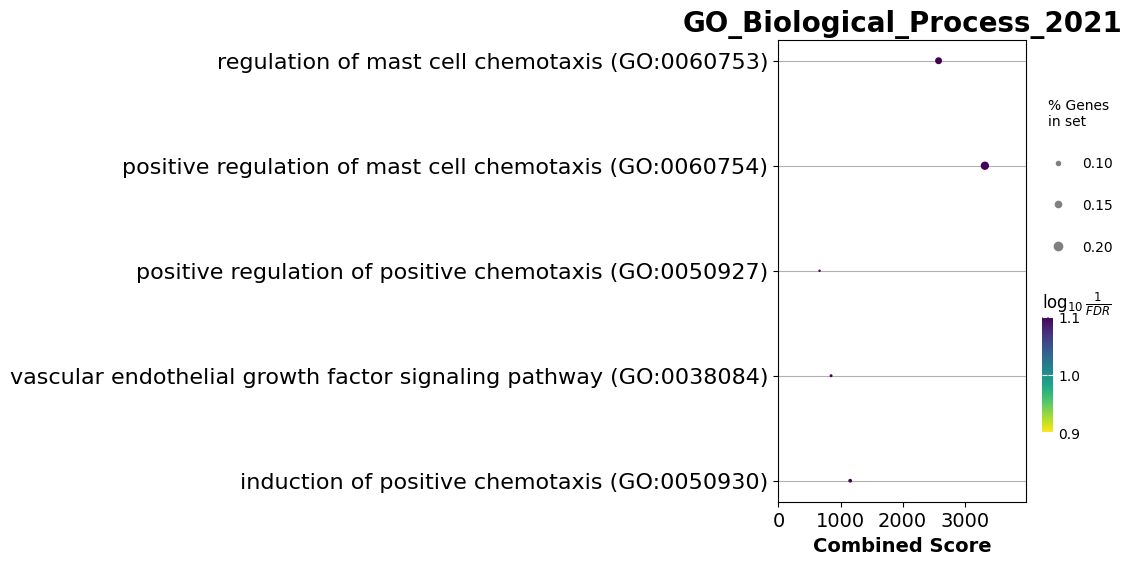

In [151]:
from gseapy.plot import barplot, dotplot
# to save your figure, make sure that ``ofname`` is not None
dotplot(enr_GOBP.res2d, title='GO_Biological_Process_2021',cmap='viridis_r')

In [152]:
#For KEGG_2021_Human
enr_KEGG = gp.enrichr(gene_list=gene_names,
 gene_sets=['KEGG_2021_Human'],
 organism='Human', 
 
 outdir=None,
 cutoff=0.05 
 )
if enr_KEGG.results.empty:
    print("No significant results found. Check your gene list and gene set selection.")
enr_KEGG.results.head(10)





,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,AGE-RAGE signaling pathway in diabetic complic...,1/100,0.048900,0.162496,0,0,22.324355,67.374230,VEGFD
1,KEGG_2021_Human,TNF signaling pathway,1/112,0.054621,0.162496,0,0,19.898899,57.852655,VEGFD
2,KEGG_2021_Human,Relaxin signaling pathway,1/129,0.062673,0.162496,0,0,17.241319,47.755386,VEGFD
3,KEGG_2021_Human,Focal adhesion,1/201,0.096095,0.162496,0,0,10.994444,25.753594,VEGFD
4,KEGG_2021_Human,Rap1 signaling pathway,1/210,0.100196,0.162496,0,0,10.516215,24.193855,VEGFD
5,KEGG_2021_Human,Ras signaling pathway,1/232,0.110152,0.162496,0,0,9.504089,20.965053,VEGFD
6,KEGG_2021_Human,Calcium signaling pathway,1/240,0.113747,0.162496,0,0,9.182241,19.960162,VEGFD
7,KEGG_2021_Human,MAPK signaling pathway,1/294,0.137676,0.172095,0,0,7.469473,14.810856,VEGFD
8,KEGG_2021_Human,PI3K-Akt signaling pathway,1/354,0.163581,0.181756,0,0,6.180988,11.190362,VEGFD
9,KEGG_2021_Human,Pathways in cancer,1/531,0.235971,0.235971,0,0,4.079665,5.891232,VEGFD


Plotting

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\gseapy\plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


<Axes: title={'center': 'KEGG_2021'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

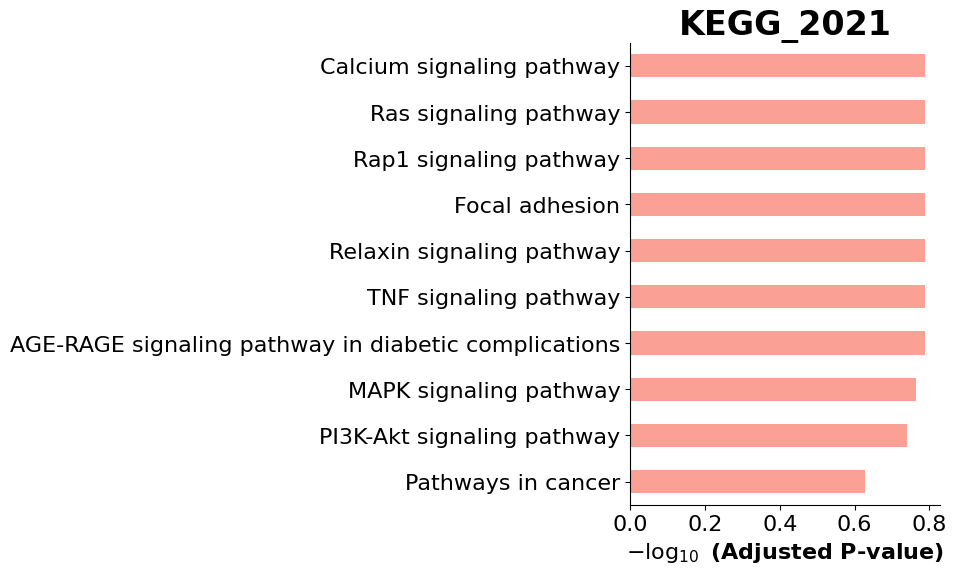

In [153]:
barplot(enr_KEGG.res2d,title='KEGG_2021',cutoff=0.25)

In [154]:
#For GO_Molecular_Function_2021
enr_GOMF = gp.enrichr(gene_list=gene_names,
 gene_sets=['GO_Molecular_Function_2021'],
 organism='Human', 
 
 outdir=None,
 cutoff=0.05 
 )
if enr_GOMF.results.empty:
    print("No significant results found. Check your gene list and gene set selection.")
enr_GOMF.results.head(10)




,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Molecular_Function_2021,vascular endothelial growth factor receptor bi...,1/12,0.005985,0.022688,0,0,201.808081,1032.951295,VEGFD
1,GO_Molecular_Function_2021,platelet-derived growth factor receptor bindin...,1/13,0.006482,0.022688,0,0,184.981481,932.059746,VEGFD
2,GO_Molecular_Function_2021,chemoattractant activity (GO:0042056),1/32,0.015889,0.037074,0,0,71.537634,296.319380,VEGFD
3,GO_Molecular_Function_2021,growth factor activity (GO:0008083),1/87,0.042667,0.059836,0,0,25.715762,81.115696,VEGFD
4,GO_Molecular_Function_2021,growth factor receptor binding (GO:0070851),1/105,0.051288,0.059836,0,0,21.245726,63.106181,VEGFD
5,GO_Molecular_Function_2021,cytokine receptor binding (GO:0005126),1/105,0.051288,0.059836,0,0,21.245726,63.106181,VEGFD
6,GO_Molecular_Function_2021,receptor ligand activity (GO:0048018),1/307,0.143349,0.143349,0,0,7.147422,13.883662,VEGFD


Plot

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\gseapy\plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


<Axes: title={'center': 'GOMF_2021'}, xlabel='Combined Score'>

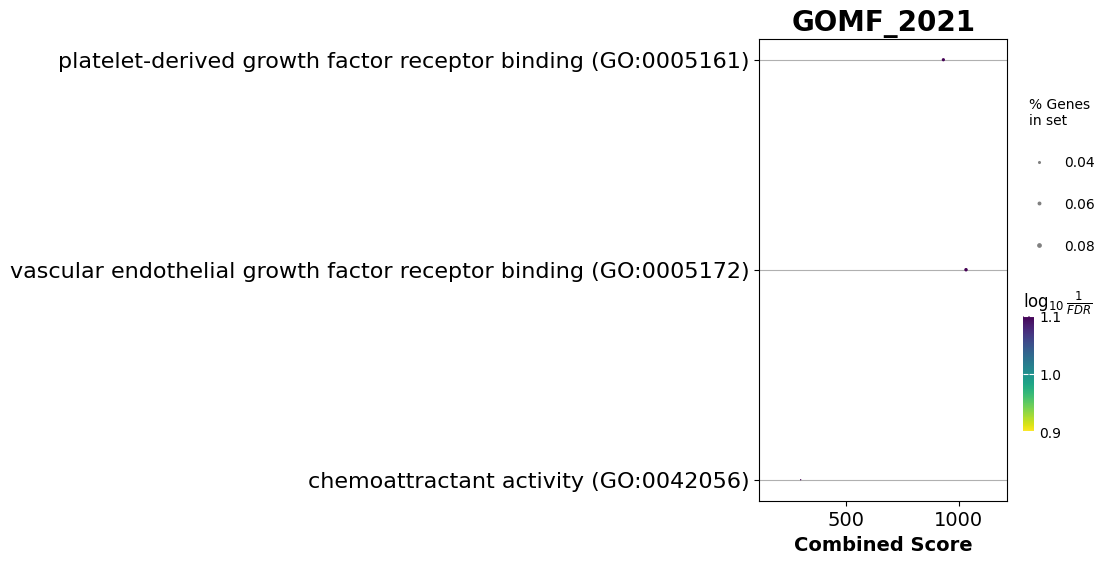

In [155]:
dotplot(enr_GOMF.res2d, title='GOMF_2021',cmap='viridis_r')

In [156]:
#For GO_Cellular_Component_2021
enr_GOCC = gp.enrichr(gene_list=gene_names,
 gene_sets=['GO_Cellular_Component_2021'],
 organism='Human', 
 
 outdir=None,
 cutoff=0.05 
 )
if enr_GOCC.results.empty:
    print("No significant results found. Check your gene list and gene set selection.")
enr_GOCC.results.head(10)


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Cellular_Component_2021,platelet alpha granule lumen (GO:0031093),1/67,0.033007,0.066164,0,0,33.542088,114.413670,VEGFD
1,GO_Cellular_Component_2021,platelet alpha granule (GO:0031091),1/90,0.044109,0.066164,0,0,24.845194,77.544064,VEGFD
2,GO_Cellular_Component_2021,secretory granule lumen (GO:0034774),1/316,0.147257,0.147257,0,0,6.940035,13.294159,VEGFD


Plot

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\gseapy\plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


<Axes: title={'center': 'GOCC_2021'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

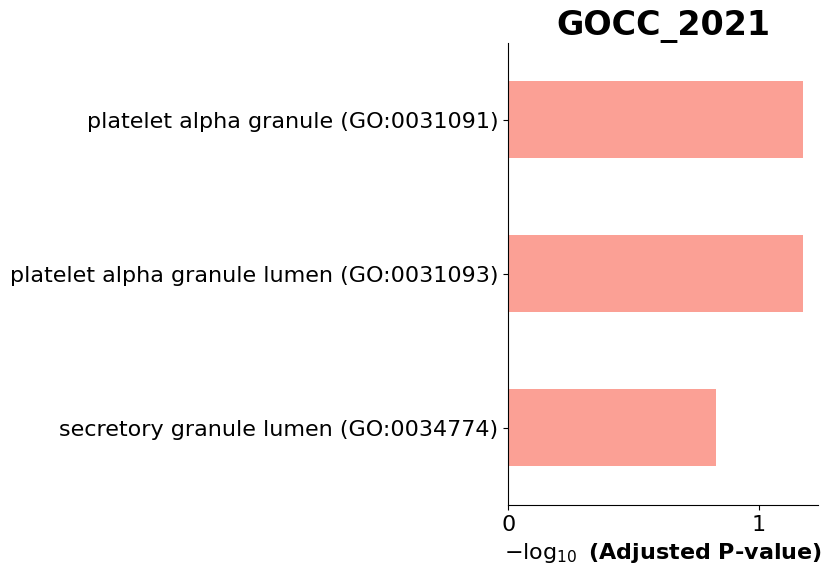

In [157]:
barplot(enr_GOCC.res2d,title='GOCC_2021', cutoff=0.25)

<h3> Step 5: Identifying another biologically or clinically interesting variable </h3>

The research article <b>"Demographic confounders distort inference of gene regulatory and gene co-expression networks in cancer"</b><sup>[1](https://doi.org/10.1093/bib/bbad413)</sup> provides extensive phenotypic data, including critical demographic factors such as age, sex, and ethnicity. It also features clinically relevant information, including cancer stage (under <code>tumor_stage.diagnoses</code>), alcohol history <code>alcohol_history.exposures</code>, and smoking history <code>tobacco_smoking_history</code>. These variables offer a thorough understanding of cancer progression, patient characteristics, and lifestyle factors that may impact gene regulatory and co-expression network inference. Their inclusion highlights their importance in cancer research and their potential implications for clinical practice.
According to the Research Paper, the biologically or clinically interesting variable is <code>cancer stage</code> <br>
The available cancer stages under this variables are: <br>
<li>stage i</li>
<li>stage ia</li>
<li>stage ib</li>
<li>stage ii</li>
<li>stage iia</li>
<li>stage iib</li>
<li>stage iii</li>
<li>stage iiia</li>
<li>stage iiib</li>
<li>stage iiic</li>
<li>stage iv</li>
<li>stage x</li>
<li>not reported</li>
<li>nan</li> <br>
The various stages of cancer, from IA to IV, are crucial in clinical research and statistical analysis, as they offer a detailed understanding of disease progression and treatment response. Early intervention strategies often target stages I and II, while stages III and IV typically require more advanced therapeutic approaches. Stages III and IV are often merged in cancer research. Therefore, I've taken into account two cancer stages <b>stage i</b> and <b>stage ii</b> for the data frame partitioning.  






In [158]:
#loading the phenotype data again
gene_data.head()
#pheno_data



,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,...,ENSG00000238244.3,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
Ensembl_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-E9-A1NI-01A,0.091708,0.019573,2.235898,0.0,2.321945,3.620056,0.0,0.337087,7.705589,0.084661,...,0.0,0.073008,0.0,0.0,0.0,3.680055,0.28564,0.0,0.599579,0.0
TCGA-A1-A0SP-01A,0.0,0.004701,1.863334,0.0,4.226699,3.546117,0.0,0.016016,6.835508,0.0,...,0.0,0.0,0.0,0.105328,0.055477,3.969785,0.115149,0.0,1.382192,0.0
TCGA-BH-A1EU-11A,0.057899,0.016302,1.704753,0.0,1.975755,3.396943,0.0,0.041455,7.12531,0.461624,...,0.0,0.039503,0.0,0.092108,0.0,3.011921,0.384451,0.0,0.629043,0.0
TCGA-A8-A06X-01A,0.0,0.0,1.947481,0.0,2.808757,4.72327,0.0,0.002361,7.259318,0.088912,...,0.0,0.118749,0.0,0.0,0.0,4.059347,0.345883,0.0,0.396315,0.0
TCGA-E2-A14T-01A,0.0,0.0,2.73469,0.0,1.964479,3.770091,0.0,0.111647,7.643035,0.066036,...,0.0,0.0,0.0,0.113546,0.0,4.249147,0.065679,0.0,0.157504,0.0


<h4>1.2 Partitioning the gene expression data frame into two data frames</h4>

In [159]:
# getting stage i  and stage ii samples

stage_i = pheno_data[pheno_data['tumor_stage.diagnoses'] == 'stage i']
stage_ii= pheno_data[pheno_data['tumor_stage.diagnoses']== 'stage ii']

The <code>pheno_data</code> DataFrame is utilized to obtain the necessary sample information. Subsequently, the <code>gene_data</code> DataFrame has to be partitioned into two distinct dataframes, one comprising stage i samples and the other containing stage ii samples, based on the intersection of their indices with <code>pheno_data</code> dataframe.

<b>Dividing <code>gene_data</code> dataframe into stage i:</b>

In [160]:
# Find common indices directly using set intersection
common_indices11 = gene_data.index.intersection(stage_i.index)

# Filter gene_data using the common indices
stage1_df = gene_data.loc[common_indices11]
stage1_df.head()


,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,...,ENSG00000238244.3,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
TCGA-BH-A1EU-11A,0.057899,0.016302,1.704753,0.0,1.975755,3.396943,0.0,0.041455,7.12531,0.461624,...,0.0,0.039503,0.0,0.092108,0.0,3.011921,0.384451,0.0,0.629043,0.0
TCGA-AR-A24S-01A,0.0,0.007594,1.281039,0.0,2.823533,3.354699,0.0,0.016829,7.558327,0.211155,...,0.0,0.01848,0.0,0.043509,0.0,3.673197,0.133605,0.0,0.488647,0.0
TCGA-E2-A1IJ-01A,0.0,0.0,2.122726,0.0,1.938215,3.319309,0.0,0.008125,7.182737,0.242024,...,0.0,0.0,0.0,0.0,0.179166,3.743573,0.169353,0.0,1.112845,0.0
TCGA-OL-A66J-01A,0.043168,0.01211,2.436963,0.0,2.119612,3.628723,0.0,0.010361,7.089232,0.323933,...,0.0,0.0,0.0,0.574359,0.203978,3.89437,0.34958,0.0,0.94267,0.0
TCGA-AR-A2LE-01A,0.0,0.005545,2.122213,0.0,1.514929,3.949108,0.0,0.00569,8.712524,0.357442,...,0.0,0.0,0.0,0.181492,0.0,3.474053,0.231795,0.0,0.25836,0.0


<b>Dividing <code>gene_data</code> dataframe into stage ii:</b>

In [161]:
# Find common indices directly using set intersection
common_indices22 = gene_data.index.intersection(stage_ii.index)

# Filter gene_data using the common indices
stage2_df = gene_data.loc[common_indices22]
stage2_df.head()


,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,...,ENSG00000238244.3,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
TCGA-EW-A6SB-01A,0.0,0.0,2.529816,0.0,3.347018,3.312544,0.0,0.194781,7.800871,0.0,...,0.0,0.0,0.0,0.0,0.094483,4.362432,0.23306,0.0,1.584005,0.0
TCGA-OK-A5Q2-01A,0.076929,0.0,2.505099,0.0,2.042445,3.756806,0.0,0.011207,7.290199,0.381417,...,0.0,0.06971,0.0,0.121915,0.064389,4.274964,0.090161,0.0,0.965823,0.0
TCGA-EW-A6SA-01A,0.0,0.008639,2.681095,0.0,1.758705,3.500689,0.0,0.010336,7.995194,0.213428,...,0.0,0.007038,0.0,0.431287,0.0,4.666719,0.140033,0.0,0.240306,0.0
TCGA-B6-A0WZ-01A,0.0,0.028972,3.005507,0.0,2.245688,2.602588,0.0,0.009975,7.486098,0.063332,...,0.0,0.054559,0.0,0.108968,0.0,3.975164,0.264026,0.0,0.371082,0.0
TCGA-AR-A2LM-01A,0.0,0.003977,1.668111,0.0,1.433473,3.792181,0.0,0.097444,6.795648,0.102038,...,0.0,0.044705,0.0,0.045489,0.0,3.860946,0.228723,0.0,0.832719,0.0


<h3> Step 2:  Identifying differentially expressed genes</h3>

<h4> 2.1 Finding genes that are differentially expressed </h4>

We need to find genes that are differentially expressed between stage-i cancer and stage-ii cancer samples using the <b>Mann-Whitney U test</b>

In [162]:
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

stage1_df = stage1_df.apply(pd.to_numeric, errors='coerce')
stage2_df = stage2_df.apply(pd.to_numeric, errors='coerce')
# Function to calculate log2 fold change
def log2_fold_change(group1, group2):
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    if mean1 == 0 or mean2 == 0:
        return np.nan # Return NaN if any mean is zero
    return np.log2(mean1 / mean2)
    
# Find common genes between both DataFrames- must be 0 since we dropped NaN from both
common_genes = stage1_df.index.intersection(stage2_df.index)
print(f"Number of common genes: {len(common_genes)}")


results1 = []
for gene in stage1_df.columns:
    # Mann-Whitney U test
    stat, p_value = mannwhitneyu(stage1_df[gene], stage2_df[gene], alternative='two-sided')
    
    # Log2 fold change calculation
    fold_change = log2_fold_change(stage1_df[gene], stage2_df[gene])

    results1.append({'Gene': gene, 'p_value': p_value, 'log2_fold_change': fold_change})

print(f"Number of results: {len(results1)}")
if len(results1) > 0:
    print(f"Example result: {results1[0]}")

Number of common genes: 0
Number of results: 60483
Example result: {'Gene': 'ENSG00000242268.2', 'p_value': 0.2686355616520585, 'log2_fold_change': 2.2254640815322055}


<b> Multiple Testing Correction </b>

In [166]:
# Create DataFrame and adjust p-values for multiple testing
results1_df = pd.DataFrame(results1)
print(f"Columns in results1_df: {results1_df.columns}")

if 'p_value' in results1_df.columns:
    # 
    results1_df['Adjusted P-value'] = multipletests(results1_df['p_value'], method='fdr_bh')[1]
else:
    raise KeyError("The 'p_value' column is missing in the results DataFrame.")

# Save to CSV
results1_df.to_csv("Output/differentially_expressed_results1.csv", index=False)
#Show the result
results1_df.head(10)

Columns in results1_df: Index(['Gene', 'p_value', 'log2_fold_change'], dtype='object')


,Gene,p_value,log2_fold_change,Adjusted P-value
0,ENSG00000242268.2,0.268636,2.225464,1.0
1,ENSG00000270112.3,0.864214,-0.001631,1.0
2,ENSG00000167578.15,0.229015,-0.193738,1.0
3,ENSG00000273842.1,0.755576,NaN,1.0
4,ENSG00000078237.5,1.000000,-0.033986,1.0
5,ENSG00000146083.10,0.503017,0.061739,1.0
6,ENSG00000225275.4,0.755576,NaN,1.0
7,ENSG00000158486.12,0.561972,0.434923,1.0
8,ENSG00000198242.12,0.503017,-0.020824,1.0
9,ENSG00000259883.1,0.375105,0.531266,1.0


<h3> Step 3:  Generating a Volcano Plot</h3>

We generate a volcano plot visualizing the results generated in Step 2, using appropriate seaborn and matplotlib functions.

In [167]:
#reading csv file:
volcano1_df=pd.read_csv("Output/differentially_expressed_results1.csv")
volcano1_df.head(10)

,Gene,p_value,log2_fold_change,Adjusted P-value
0,ENSG00000242268.2,0.268636,2.225464,1.0
1,ENSG00000270112.3,0.864214,-0.001631,1.0
2,ENSG00000167578.15,0.229015,-0.193738,1.0
3,ENSG00000273842.1,0.755576,NaN,1.0
4,ENSG00000078237.5,1.000000,-0.033986,1.0
5,ENSG00000146083.10,0.503017,0.061739,1.0
6,ENSG00000225275.4,0.755576,NaN,1.0
7,ENSG00000158486.12,0.561972,0.434923,1.0
8,ENSG00000198242.12,0.503017,-0.020824,1.0
9,ENSG00000259883.1,0.375105,0.531266,1.0


We need to highlight the 10 genes with the smallest P-values by plotting them in a different color and annotating the dots with the gene IDs.

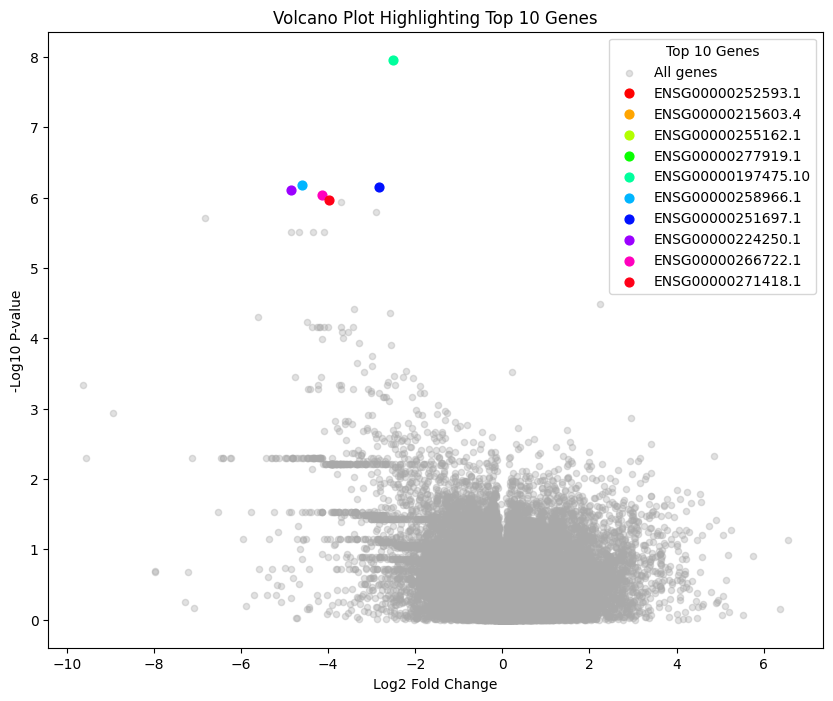

In [169]:
# Sort the DataFrame by p-value and extract the top 10 genes
top_genes1_df = volcano1_df.nsmallest(10, 'p_value')
colors = plt.cm.hsv(np.linspace(0, 1, 10))

# Create scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(volcano1_df['log2_fold_change'], -np.log10(volcano1_df['p_value']), color='darkgrey', label='All genes', alpha=0.35, s=20)

# Plot top genes with individual colors and labels
for i in range(len(top_genes1_df)):  
    row = top_genes1_df.iloc[i]  
    plt.scatter(row['log2_fold_change'], -np.log10(row['p_value']), color=colors[i], s=40, label=row['Gene'])
    
# Annotate the top 10 genes
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='All genes', markerfacecolor='gray', markersize=8)]  # Legend entry for 'All genes'
for i in range(len(top_genes1_df)):
    row = top_genes1_df.iloc[i]
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label=row['Gene'], markerfacecolor=colors[i], markersize=8))
# Add labels and title
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 P-value')
plt.title('Volcano Plot Highlighting Top 10 Genes')
plt.legend(title="Top 10 Genes")

#Saving the figure into pdf and displaying the plot
plt.savefig('Output/Top_10_Gene_Volcano_Plot1.pdf')
# Show the plot
plt.show()

<h3>Step 4: Carry out gene set enrichment analysis</h3>

Gene Set Enrichment Analysis (GSEA) assesses whether a predefined group of genes exhibits statistically significant differences in expression between two biological conditions

<b> Importing necessary libraries </b>

In [170]:
import gseapy as gp
import re
from gseapy import Biomart
from pybiomart import Server
import pandas as pd
import matplotlib.pyplot as plt
#top_genes_df.head()
a1_df=volcano1_df.nsmallest(20, 'p_value')

# 1. Ensure gene_names are strings before mapping to Ensembl IDs
analysis1_df = pd.DataFrame(a1_df)
print(f"analysis_df\n: {analysis1_df}")

# Remove version numbers from Ensembl IDs (everything after the dot)
analysis1_df['Gene'] = analysis1_df['Gene'].str.split('.').str[0]
top_genes1=analysis1_df['Gene']
top_genes_list1=top_genes1.tolist()
top_genes_list1== list(set(top_genes_list1))
print(f"top_genes_list1\n: {top_genes_list1}")

bm = Biomart()
querry1={'ensembl_gene_id': top_genes_list1}
print(f"querry\n: {querry1}")

# Query Biomart to map Ensembl IDs to gene names
gene_name_mapping1 = bm.query(dataset='hsapiens_gene_ensembl', 
                                  attributes=['ensembl_gene_id', 'external_gene_name'],
                                  filters= querry1)

# Extract only the gene names and convert to list
gene_names1 = gene_name_mapping1['external_gene_name'].dropna().tolist() 
print(gene_names1)

analysis_df
:                      Gene       p_value  log2_fold_change  Adjusted P-value
14997   ENSG00000252593.1  3.326616e-09               NaN          0.000050
18272   ENSG00000215603.4  3.326616e-09               NaN          0.000050
24666   ENSG00000255162.1  3.326616e-09               NaN          0.000050
49007   ENSG00000277919.1  3.326616e-09               NaN          0.000050
1623   ENSG00000197475.10  1.093625e-08         -2.520675          0.000132
56482   ENSG00000258966.1  6.518346e-07         -4.593288          0.005849
30269   ENSG00000251697.1  7.055399e-07         -2.842506          0.005849
51383   ENSG00000224250.1  7.736023e-07         -4.850052          0.005849
49137   ENSG00000266722.1  9.171347e-07         -4.134281          0.006163
43504   ENSG00000271418.1  1.086135e-06         -3.986623          0.006241
43689   ENSG00000205409.3  1.135015e-06         -3.706337          0.006241
10739   ENSG00000229002.1  1.618507e-06         -2.894592          0.00815

In [171]:
#For GO_Biological_Process_2021
enr_GOBP1 = gp.enrichr(gene_list=gene_names1,
 gene_sets=['GO_Biological_Process_2021'],
 organism='Human', 
 
 outdir=None,
 cutoff=0.05 
 )
if enr_GOBP1.results.empty:
    print("No significant results found. Check your gene list and gene set selection.")

enr_GOBP1.results.head(10)


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2021,sphingoid metabolic process (GO:0046519),1/12,0.006582,0.035110,0,0,181.618182,912.349418,ASAH2
1,GO_Biological_Process_2021,sphingoid biosynthetic process (GO:0046520),1/13,0.007129,0.035110,0,0,166.475000,822.994870,ASAH2
2,GO_Biological_Process_2021,sphingosine biosynthetic process (GO:0046512),1/13,0.007129,0.035110,0,0,166.475000,822.994870,ASAH2
3,GO_Biological_Process_2021,ceramide catabolic process (GO:0046514),1/16,0.008767,0.035110,0,0,133.160000,630.747463,ASAH2
4,GO_Biological_Process_2021,sphingolipid catabolic process (GO:0030149),1/16,0.008767,0.035110,0,0,133.160000,630.747463,ASAH2
5,GO_Biological_Process_2021,diol biosynthetic process (GO:0034312),1/17,0.009313,0.035110,0,0,124.831250,583.759451,ASAH2
6,GO_Biological_Process_2021,sphingosine metabolic process (GO:0006670),1/19,0.010403,0.035110,0,0,110.950000,506.560232,ASAH2
7,GO_Biological_Process_2021,diol metabolic process (GO:0034311),1/19,0.010403,0.035110,0,0,110.950000,506.560232,ASAH2
8,GO_Biological_Process_2021,long-chain fatty acid biosynthetic process (GO...,1/30,0.016381,0.045691,0,0,68.827586,282.994903,ASAH2
9,GO_Biological_Process_2021,cellular nitrogen compound biosynthetic proces...,1/31,0.016923,0.045691,0,0,66.530000,271.383130,ASAH2


Plotting

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\gseapy\plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


<Axes: title={'center': 'GO_Biological_Process_2021'}, xlabel='Combined Score'>

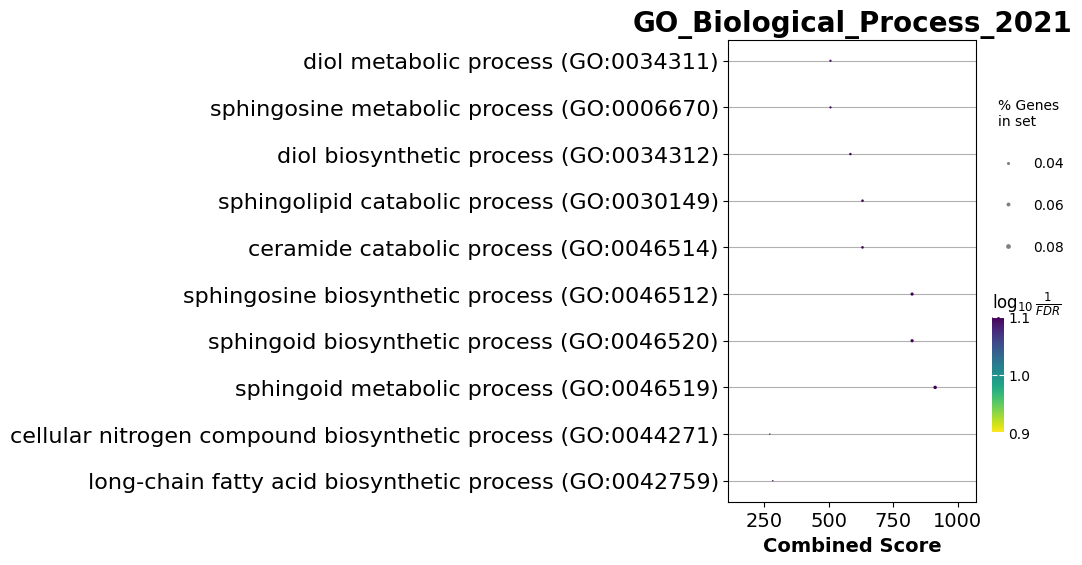

In [172]:
from gseapy.plot import barplot, dotplot
# to save your figure, make sure that ``ofname`` is not None
dotplot(enr_GOBP1.res2d, title='GO_Biological_Process_2021',cmap='viridis_r')

In [173]:
#For KEGG_2021_Human
enr_KEGG1 = gp.enrichr(gene_list=gene_names1,
 gene_sets=['KEGG_2021_Human'],
 organism='Human', 
 
 outdir=None,
 cutoff=0.05 
 )
if enr_KEGG1.results.empty:
    print("No significant results found. Check your gene list and gene set selection.")
enr_KEGG1.results.head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Sphingolipid metabolism,1/49,0.026629,0.079886,0,0,41.543750,150.627939,ASAH2
1,KEGG_2021_Human,Sphingolipid signaling pathway,1/119,0.063552,0.095329,0,0,16.839831,46.408739,ASAH2
2,KEGG_2021_Human,Olfactory transduction,1/440,0.217110,0.217110,0,0,4.453303,6.801758,OR52E6


Plotting

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\gseapy\plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


<Axes: title={'center': 'KEGG_2021'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

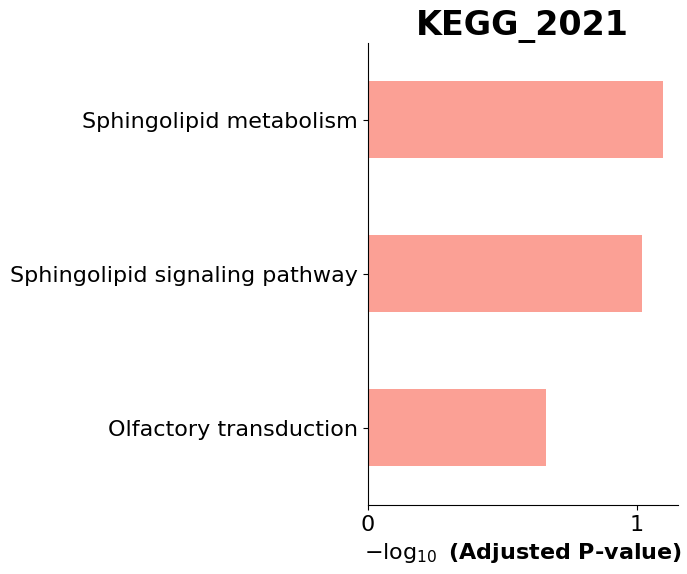

In [174]:
barplot(enr_KEGG1.res2d,title='KEGG_2021',cutoff=0.25)

In [175]:
#For GO_Molecular_Function_2021
enr_GOMF1 = gp.enrichr(gene_list=gene_names1,
 gene_sets=['GO_Molecular_Function_2021'],
 organism='Human', 
 
 outdir=None,
 cutoff=0.05 
 )
if enr_GOMF1.results.empty:
    print("No significant results found. Check your gene list and gene set selection.")
enr_GOMF1.results.head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Molecular_Function_2021,N-acylsphingosine amidohydrolase activity (GO:...,1/7,0.003844,0.023065,0,0,333.050000,1852.156675,ASAH2
1,GO_Molecular_Function_2021,"hydrolase activity, acting on carbon-nitrogen ...",1/57,0.030914,0.092743,0,0,35.594643,123.745853,ASAH2
2,GO_Molecular_Function_2021,zinc ion binding (GO:0008270),1/336,0.170072,0.250360,0,0,5.866866,10.393345,ASAH2
3,GO_Molecular_Function_2021,calcium ion binding (GO:0005509),1/348,0.175628,0.250360,0,0,5.660519,9.845845,ASAH2
4,GO_Molecular_Function_2021,transition metal ion binding (GO:0046914),1/445,0.219309,0.250360,0,0,4.402027,6.679078,ASAH2
5,GO_Molecular_Function_2021,metal ion binding (GO:0046872),1/517,0.250360,0.250360,0,0,3.773837,5.226219,ASAH2


Plot

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\gseapy\plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


<Axes: title={'center': 'GOMF_2021'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

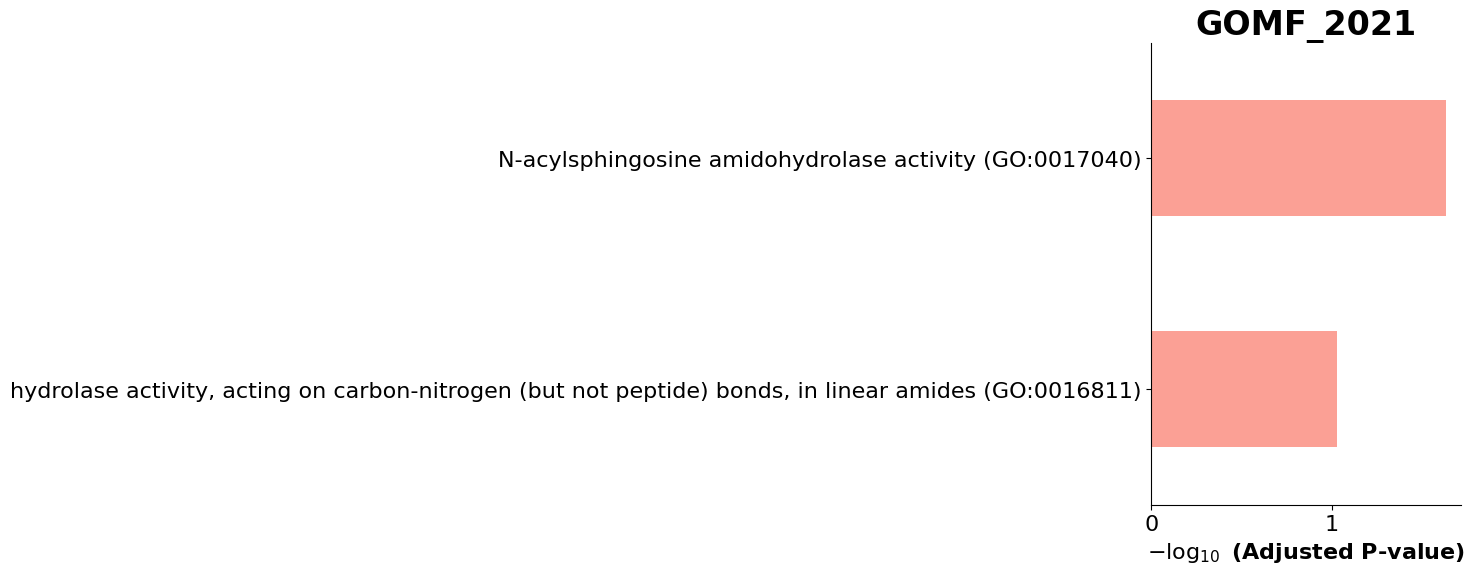

In [179]:
barplot(enr_GOMF1.res2d,title='GOMF_2021',cutoff=0.25)

In [180]:
#For GO_Cellular_Component_2021
enr_GOCC1 = gp.enrichr(gene_list=gene_names1,
 gene_sets=['GO_Cellular_Component_2021'],
 organism='Human', 
 
 outdir=None,
 cutoff=0.05 
 )
if enr_GOCC1.results.empty:
    print("No significant results found. Check your gene list and gene set selection.")
enr_GOCC1.results.head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Cellular_Component_2021,caveola (GO:0005901),1/60,0.032517,0.088395,0,0,33.779661,115.728605,ASAH2
1,GO_Cellular_Component_2021,plasma membrane raft (GO:0044853),1/82,0.044197,0.088395,0,0,24.577778,76.660323,ASAH2
2,GO_Cellular_Component_2021,membrane raft (GO:0045121),1/163,0.086105,0.114807,0,0,12.238889,30.012054,ASAH2
3,GO_Cellular_Component_2021,integral component of plasma membrane (GO:0005...,1/1454,0.564157,0.564157,0,0,1.275705,0.730242,ASAH2


Plot

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\gseapy\plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


<Axes: title={'center': 'GOCC_2021'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

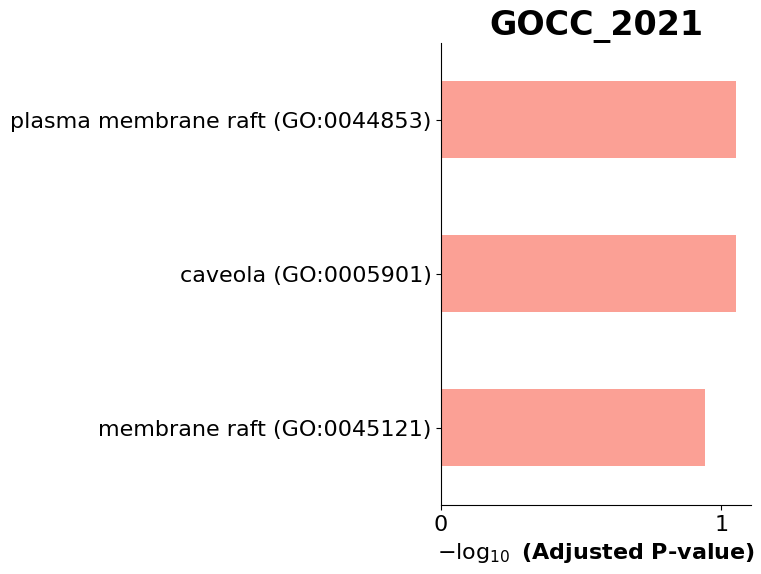

In [181]:
barplot(enr_GOCC1.res2d,title='GOCC_2021', cutoff=0.25)